In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [21]:
# Average GDP of each country
Average_gdp = df.groupby('Country').GDP.mean()
print(Average_gdp)

Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64


ANALYSIS QUESTION
Has life expectancy increased over time in the six nations?
Has GDP increased over time in the six nations?
Is there a correlation between GDP and life expectancy of a country?
What is the average life expectancy in these nations?

## Life expectancy overview in each country

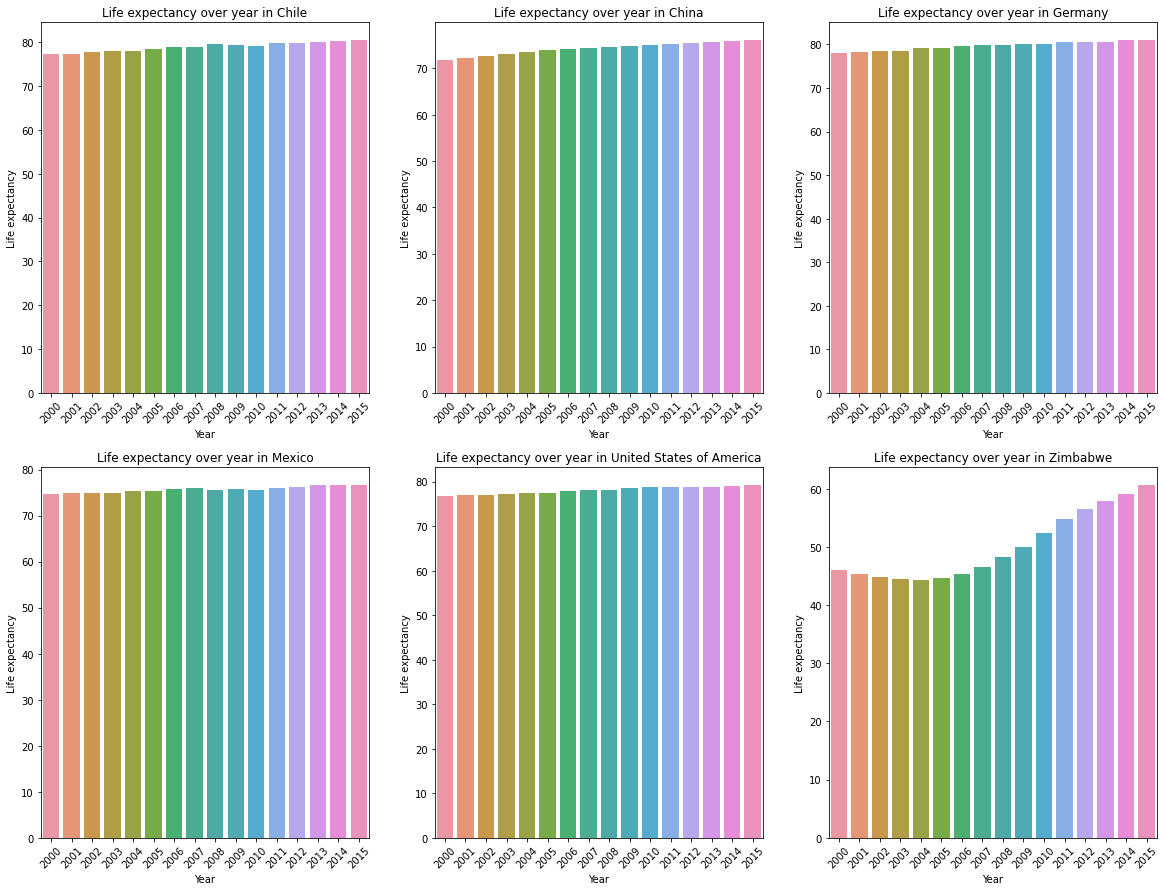

<Figure size 432x288 with 0 Axes>

In [46]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
f, axs = plt.subplots(2,3,figsize=(20,15))

def life_expectancy(country, position):
    country_data = df[df['Country'] == country]    
    ax1 = plt.subplot(2,3,position)
    sns.barplot(data = country_data, x = "Year", y = "Life expectancy at birth (years)")
    plt.title('Life expectancy over year in {}'.format(country))
    plt.xlabel('Year')
    plt.ylabel('Life expectancy')
    plt.xticks(rotation = 45)

for idx, country in enumerate(countries):
    life_expectancy(country, idx + 1)

plt.show()
plt.clf()


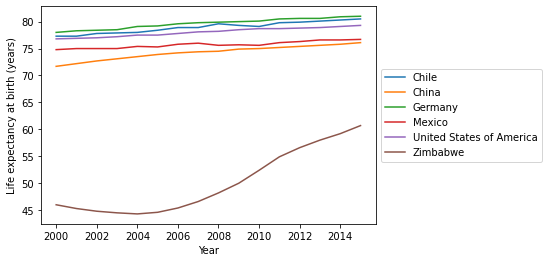

<Figure size 432x288 with 0 Axes>

In [74]:
sns.lineplot(x = "Year", y = "Life expectancy at birth (years)", data = df, hue = 'Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.clf()

## Average GDP over countries

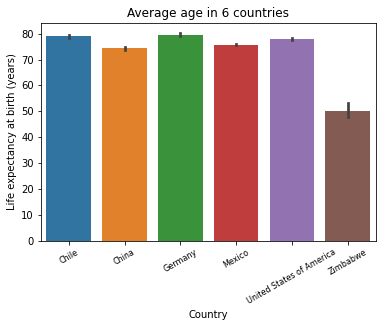

<Figure size 432x288 with 0 Axes>

In [43]:
sns.barplot(data = df, x = "Country", y = "Life expectancy at birth (years)")
plt.xticks(rotation = 30, fontsize = 8)
plt.title("Average age in 6 countries")
plt.show()
plt.clf()

## GDP overview in each country

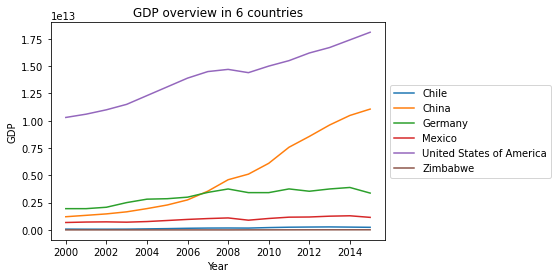

<Figure size 432x288 with 0 Axes>

In [44]:
sns.lineplot(x = "Year", y = "GDP", data = df, hue = 'Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('GDP overview in 6 countries')
plt.show()
plt.clf()

## Correlation between GDP and life expectancy

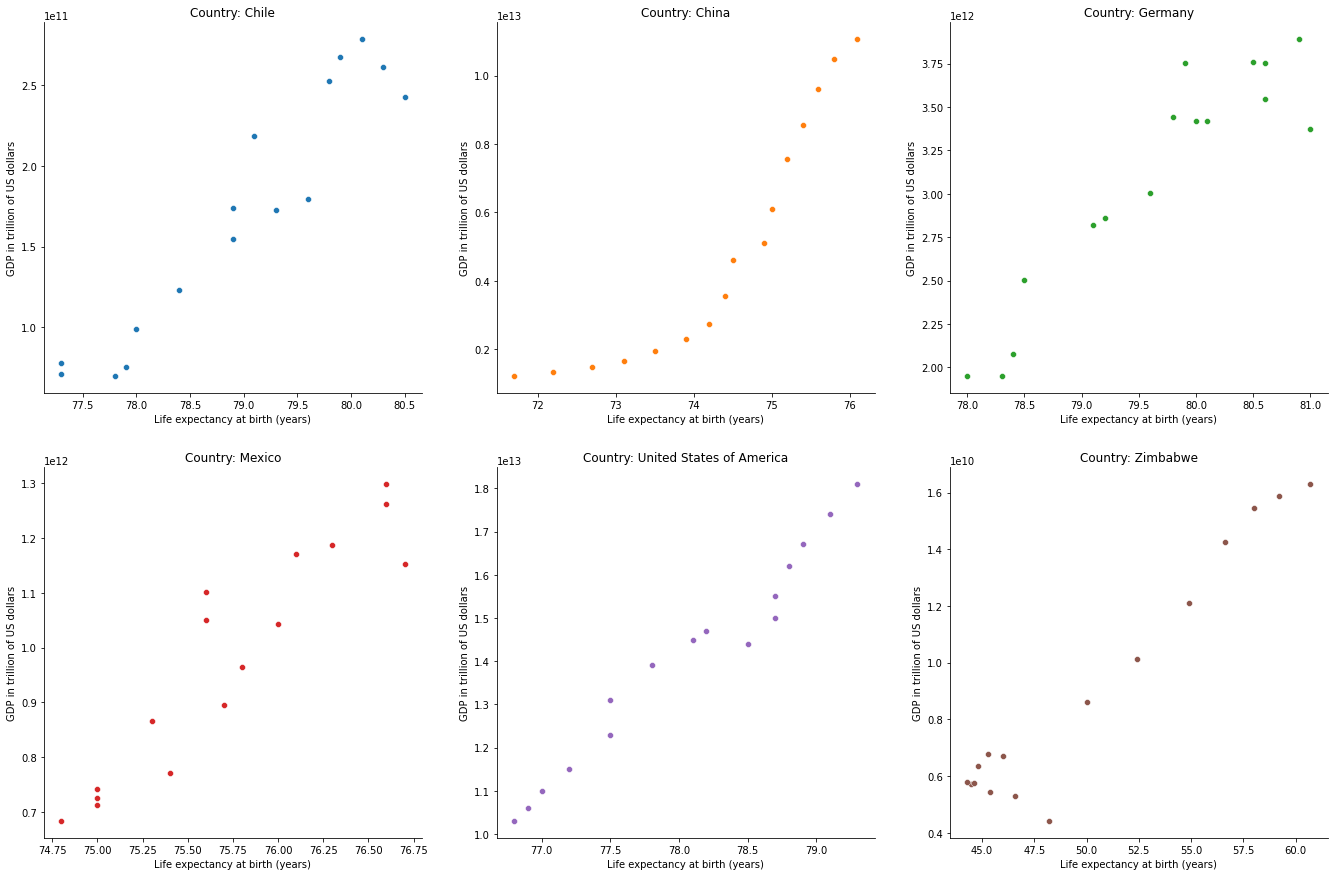

In [73]:
colors = plt.rcParams["axes.prop_cycle"]()
f, axs = plt.subplots(2,3,figsize=(23,15))

def correlation(country, position):
    country_data = df[df['Country'] == country]    
    ax = plt.subplot(2,3,position)
    # Get the next color from the cycler
    c = next(colors)["color"]
    sns.scatterplot(data = country_data, y = "GDP", x = "Life expectancy at birth (years)", color = c,)
    plt.title('Country: {}'.format(country))
    plt.ylabel('GDP in trillion of US dollars')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

for idx, country in enumerate(countries):
    correlation(country, idx + 1)

plt.show()